In [156]:
# 首先导入包
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import torchvision.models as models
# This is for the progress bar.
from tqdm import tqdm
import seaborn as sns
import json

In [157]:
basedir="D:/dataset_garb/garbagedir/dir/"

In [158]:
check={'0':"可回收垃圾",'1':"有害垃圾",'2':"厨余垃圾",'3':"其他垃圾"}

In [159]:
check2={"可回收垃圾":'0',"有害垃圾":'1',"厨余垃圾":'2',"其他垃圾":'3'}

读取txt文件 转成json文件

In [160]:
name_to_id={}
id_to_name={}

In [161]:
def get_ni_map(txtfile,pre):
    with open(txtfile,'r',encoding='utf-8') as f:
        txtlines=f.readlines()
    count=0
    for line in txtlines:
        bigid,name=line.strip().split("\t")
        new_name=check[str(bigid)]+'/'+name
        bigid=int(bigid)
        name_to_id[new_name]=pre+count
        count+=1
    return pre+count

In [162]:
def get_in_map(map_):
    for key in map_:
        id_to_name[str(map_[key])]=key

In [163]:
file_0="0 可回收垃圾.txt"
file_1="1 有害垃圾.txt"
file_2="2 厨余垃圾.txt"
file_3="3 其他垃圾.txt"
pre=0
pre=get_ni_map(basedir+file_0,pre)
pre=get_ni_map(basedir+file_1,pre)
pre=get_ni_map(basedir+file_2,pre)
pre=get_ni_map(basedir+file_3,pre)
get_in_map(name_to_id)

In [164]:
name_to_id

{'可回收垃圾/传单': 0,
 '可回收垃圾/充电宝': 1,
 '可回收垃圾/包': 2,
 '可回收垃圾/塑料玩具': 3,
 '可回收垃圾/塑料碗盆': 4,
 '可回收垃圾/塑料衣架': 5,
 '可回收垃圾/快递纸袋': 6,
 '可回收垃圾/报纸': 7,
 '可回收垃圾/插头电线': 8,
 '可回收垃圾/旧书': 9,
 '可回收垃圾/旧衣服': 10,
 '可回收垃圾/易拉罐': 11,
 '可回收垃圾/杂志': 12,
 '可回收垃圾/枕头': 13,
 '可回收垃圾/毛绒玩具': 14,
 '可回收垃圾/泡沫塑料': 15,
 '可回收垃圾/洗发水瓶': 16,
 '可回收垃圾/牛奶盒等利乐包装': 17,
 '可回收垃圾/玻璃': 18,
 '可回收垃圾/玻璃瓶罐': 19,
 '可回收垃圾/皮鞋': 20,
 '可回收垃圾/砧板': 21,
 '可回收垃圾/纸板箱': 22,
 '可回收垃圾/调料瓶': 23,
 '可回收垃圾/酒瓶': 24,
 '可回收垃圾/金属食品罐': 25,
 '可回收垃圾/锅': 26,
 '可回收垃圾/食用油桶': 27,
 '可回收垃圾/饮料瓶': 28,
 '有害垃圾/干电池': 29,
 '有害垃圾/废弃水银温度计': 30,
 '有害垃圾/废旧灯管灯泡': 31,
 '有害垃圾/杀虫剂容器': 32,
 '有害垃圾/电池': 33,
 '有害垃圾/软膏': 34,
 '有害垃圾/过期药物': 35,
 '有害垃圾/除草剂容器': 36,
 '厨余垃圾/剩菜剩饭': 37,
 '厨余垃圾/大骨头': 38,
 '厨余垃圾/果壳瓜皮': 39,
 '厨余垃圾/残枝落叶': 40,
 '厨余垃圾/水果果皮': 41,
 '厨余垃圾/水果果肉': 42,
 '厨余垃圾/茶叶渣': 43,
 '厨余垃圾/菜梗菜叶': 44,
 '厨余垃圾/落叶': 45,
 '厨余垃圾/蛋壳': 46,
 '厨余垃圾/西餐糕点': 47,
 '厨余垃圾/鱼骨': 48,
 '其他垃圾/一次性餐具': 49,
 '其他垃圾/化妆品瓶': 50,
 '其他垃圾/卫生纸': 51,
 '其他垃圾/尿片': 52,
 '其他垃圾/污损塑料': 53,
 '其他垃圾/烟蒂': 54,
 '其他垃圾/牙签': 55,
 '其他垃圾/破碎花

In [165]:
id_to_name

{'0': '可回收垃圾/传单',
 '1': '可回收垃圾/充电宝',
 '2': '可回收垃圾/包',
 '3': '可回收垃圾/塑料玩具',
 '4': '可回收垃圾/塑料碗盆',
 '5': '可回收垃圾/塑料衣架',
 '6': '可回收垃圾/快递纸袋',
 '7': '可回收垃圾/报纸',
 '8': '可回收垃圾/插头电线',
 '9': '可回收垃圾/旧书',
 '10': '可回收垃圾/旧衣服',
 '11': '可回收垃圾/易拉罐',
 '12': '可回收垃圾/杂志',
 '13': '可回收垃圾/枕头',
 '14': '可回收垃圾/毛绒玩具',
 '15': '可回收垃圾/泡沫塑料',
 '16': '可回收垃圾/洗发水瓶',
 '17': '可回收垃圾/牛奶盒等利乐包装',
 '18': '可回收垃圾/玻璃',
 '19': '可回收垃圾/玻璃瓶罐',
 '20': '可回收垃圾/皮鞋',
 '21': '可回收垃圾/砧板',
 '22': '可回收垃圾/纸板箱',
 '23': '可回收垃圾/调料瓶',
 '24': '可回收垃圾/酒瓶',
 '25': '可回收垃圾/金属食品罐',
 '26': '可回收垃圾/锅',
 '27': '可回收垃圾/食用油桶',
 '28': '可回收垃圾/饮料瓶',
 '29': '有害垃圾/干电池',
 '30': '有害垃圾/废弃水银温度计',
 '31': '有害垃圾/废旧灯管灯泡',
 '32': '有害垃圾/杀虫剂容器',
 '33': '有害垃圾/电池',
 '34': '有害垃圾/软膏',
 '35': '有害垃圾/过期药物',
 '36': '有害垃圾/除草剂容器',
 '37': '厨余垃圾/剩菜剩饭',
 '38': '厨余垃圾/大骨头',
 '39': '厨余垃圾/果壳瓜皮',
 '40': '厨余垃圾/残枝落叶',
 '41': '厨余垃圾/水果果皮',
 '42': '厨余垃圾/水果果肉',
 '43': '厨余垃圾/茶叶渣',
 '44': '厨余垃圾/菜梗菜叶',
 '45': '厨余垃圾/落叶',
 '46': '厨余垃圾/蛋壳',
 '47': '厨余垃圾/西餐糕点',
 '48': '厨余垃圾/鱼骨',
 '49': '其他垃圾/一次性餐具',
 '50': '其他垃

In [166]:
def get_df():
    img_path=[]
    label_name=[]
    label_id=[]
    label_bigid=[]
    label_bigname=[]
    for name in name_to_id:
        assert (os.path.exists(basedir+name))
        add=os.listdir(basedir+name)
        for item in add:
            img_path.append(basedir+name+item)
            label_name.append(name)
            label_bigname.append(name.split('/')[0])
            label_bigid.append(check2[name.split('/')[0]])
            label_id.append(name_to_id[name])
    df=pd.DataFrame()
    df['img_path']=img_path
    df['label']=label_id
    df['label_explain']=label_name
    df['label_bigname']=label_bigname
    df['label_bigid']=label_bigid
    
    return df  

In [167]:
df=get_df()

In [153]:
df

,img_path,label,label_explain,label_bigname,label_bigid
0,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单baidu00...,0,可回收垃圾/传单,可回收垃圾,0
1,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单baidu00...,0,可回收垃圾/传单,可回收垃圾,0
2,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单baidu00...,0,可回收垃圾/传单,可回收垃圾,0
3,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单baidu00...,0,可回收垃圾/传单,可回收垃圾,0
4,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单baidu00...,0,可回收垃圾/传单,可回收垃圾,0
...,...,...,...,...,...
29694,D:/dataset_garb/garbagedir/dir/其他垃圾/贝壳bing0001...,59,其他垃圾/贝壳,其他垃圾,3
29695,D:/dataset_garb/garbagedir/dir/其他垃圾/贝壳bing0001...,59,其他垃圾/贝壳,其他垃圾,3
29696,D:/dataset_garb/garbagedir/dir/其他垃圾/贝壳bing0001...,59,其他垃圾/贝壳,其他垃圾,3
29697,D:/dataset_garb/garbagedir/dir/其他垃圾/贝壳bing0001...,59,其他垃圾/贝壳,其他垃圾,3


In [135]:
#解决sns无法展示中文
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=15)
sns.set(font=myfont.get_name())

def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
    #finding top leaves
def plot_df(df,savename):
    
    plt.figure(figsize = (15,30))
    ax0 =sns.countplot(y=df['label_explain'],order=df['label_explain'].value_counts().index)
    barw(ax0)
    plt.savefig(savename)
    plt.show()

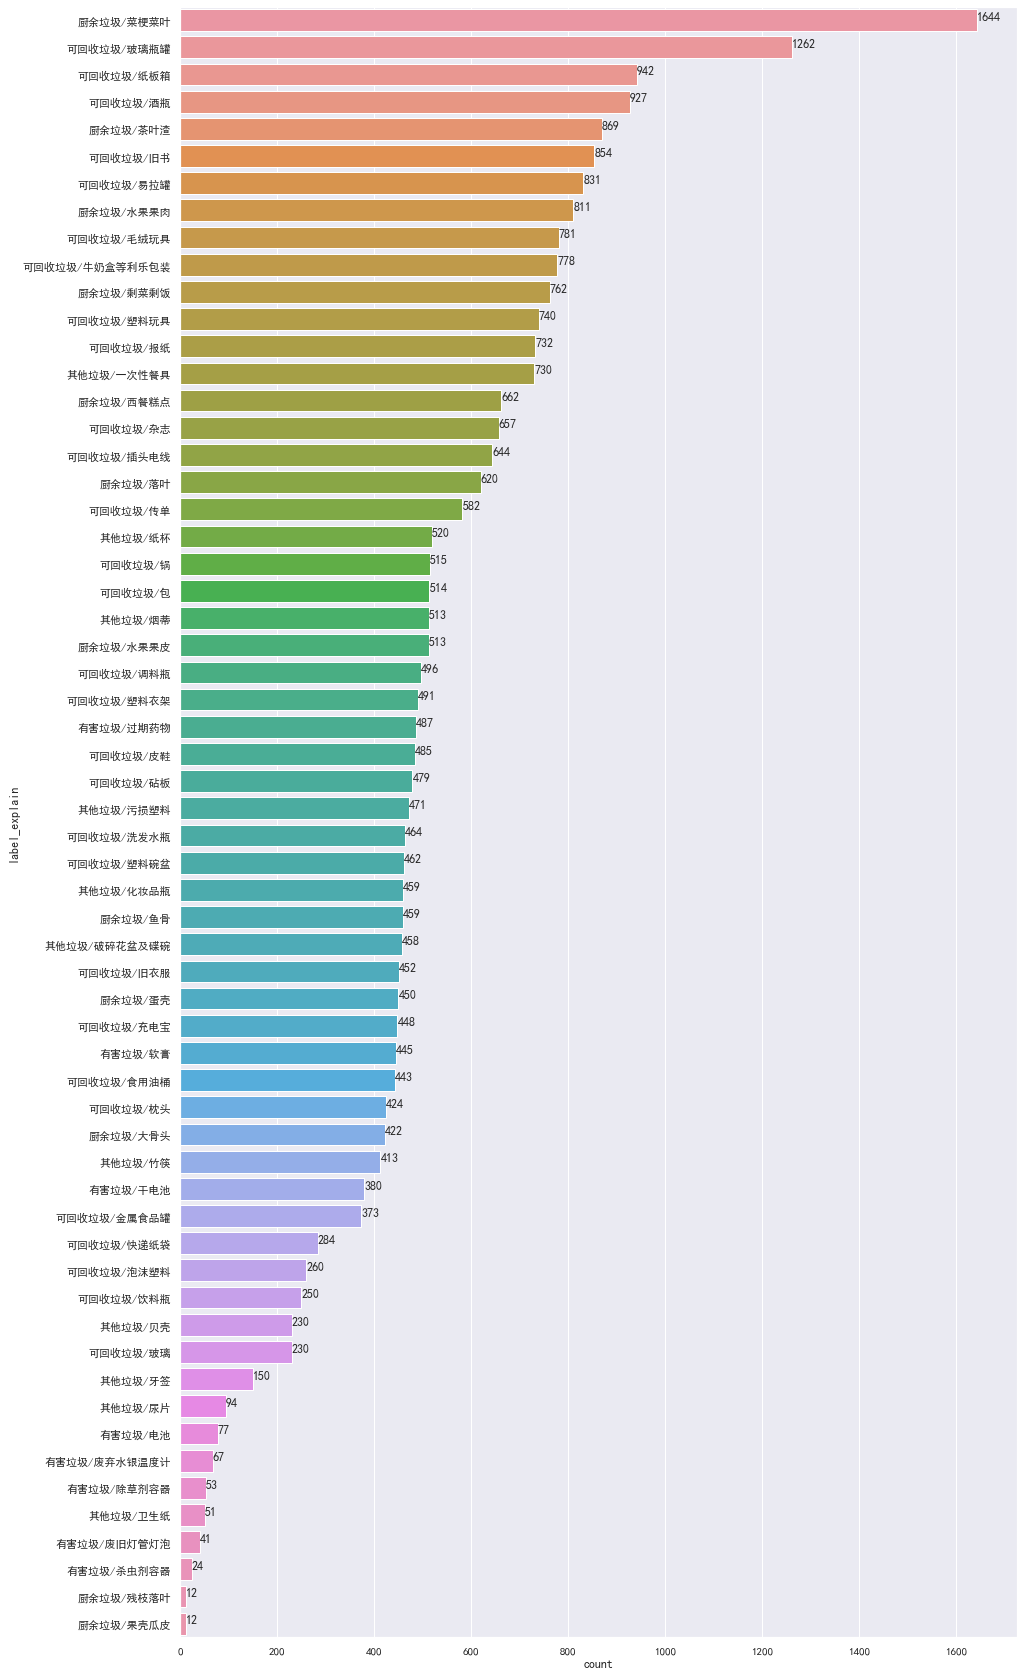

In [135]:
plot_df(df)

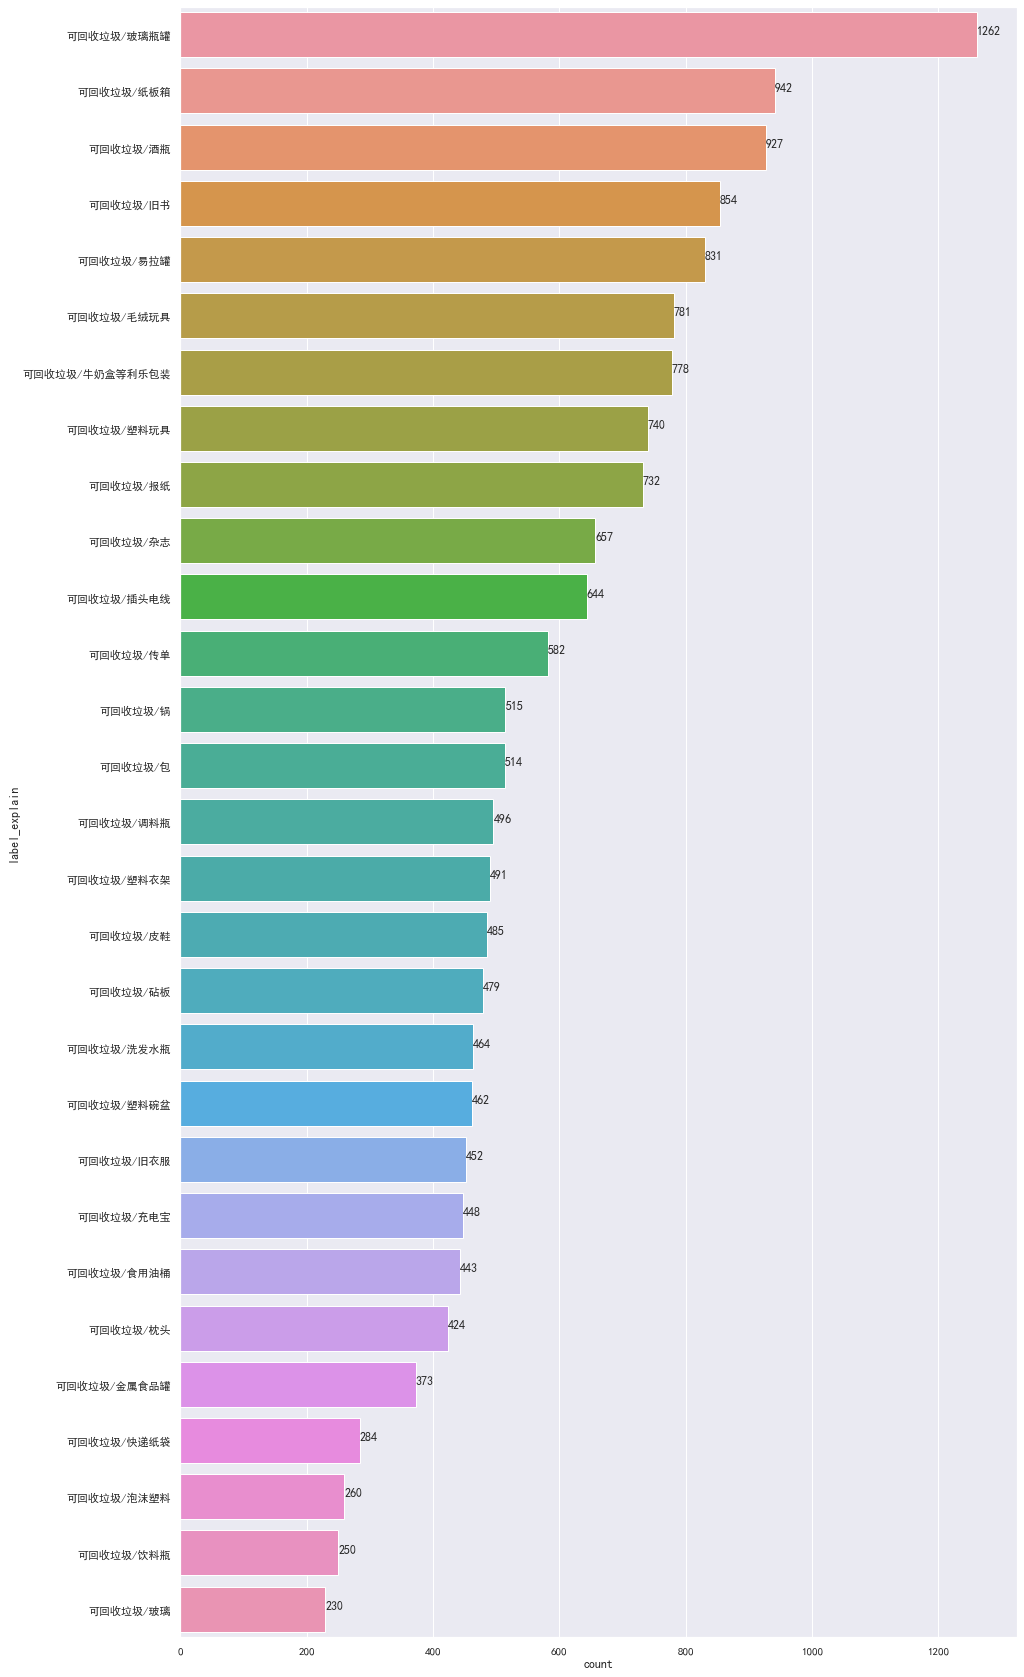

In [137]:
plot_df(df[df['label_bigid']=='0'],"able.jpg") #可回收

In [159]:
#合并除草剂容器 杀虫剂容器
#合并电池 干电池

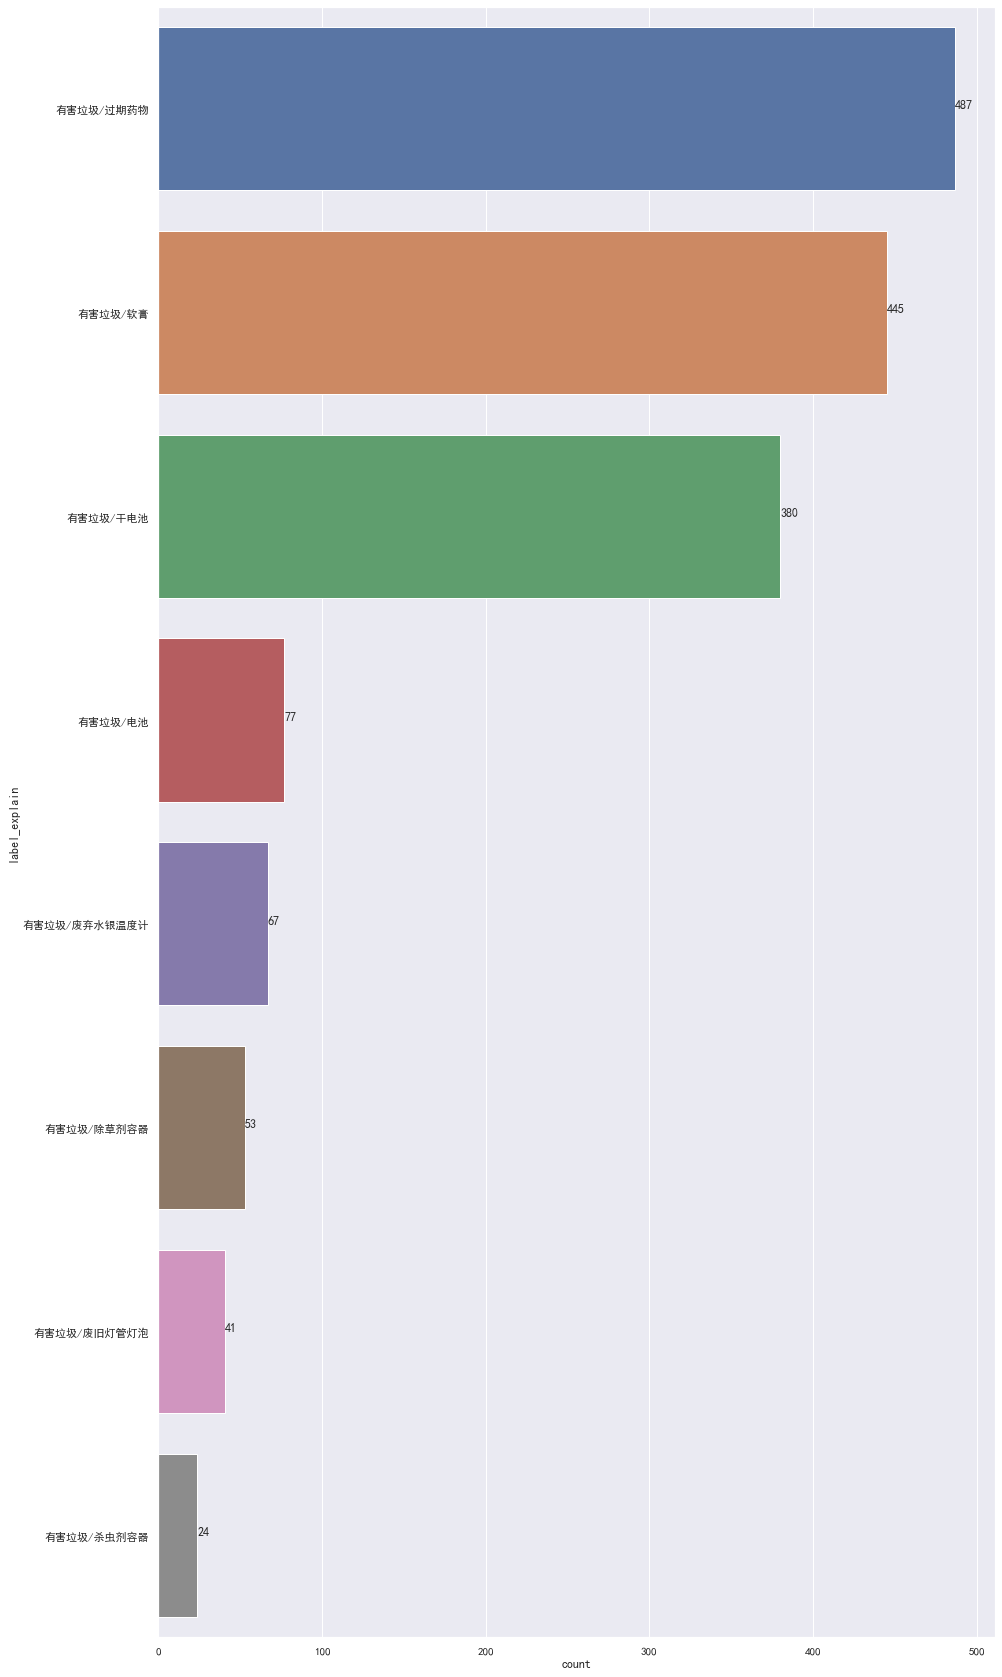

In [136]:
plot_df(df[df['label_bigid']=='1'],"danger.jpg") #有害

In [158]:
#合并果壳瓜皮 水果果肉
#合并残枝落叶 落叶

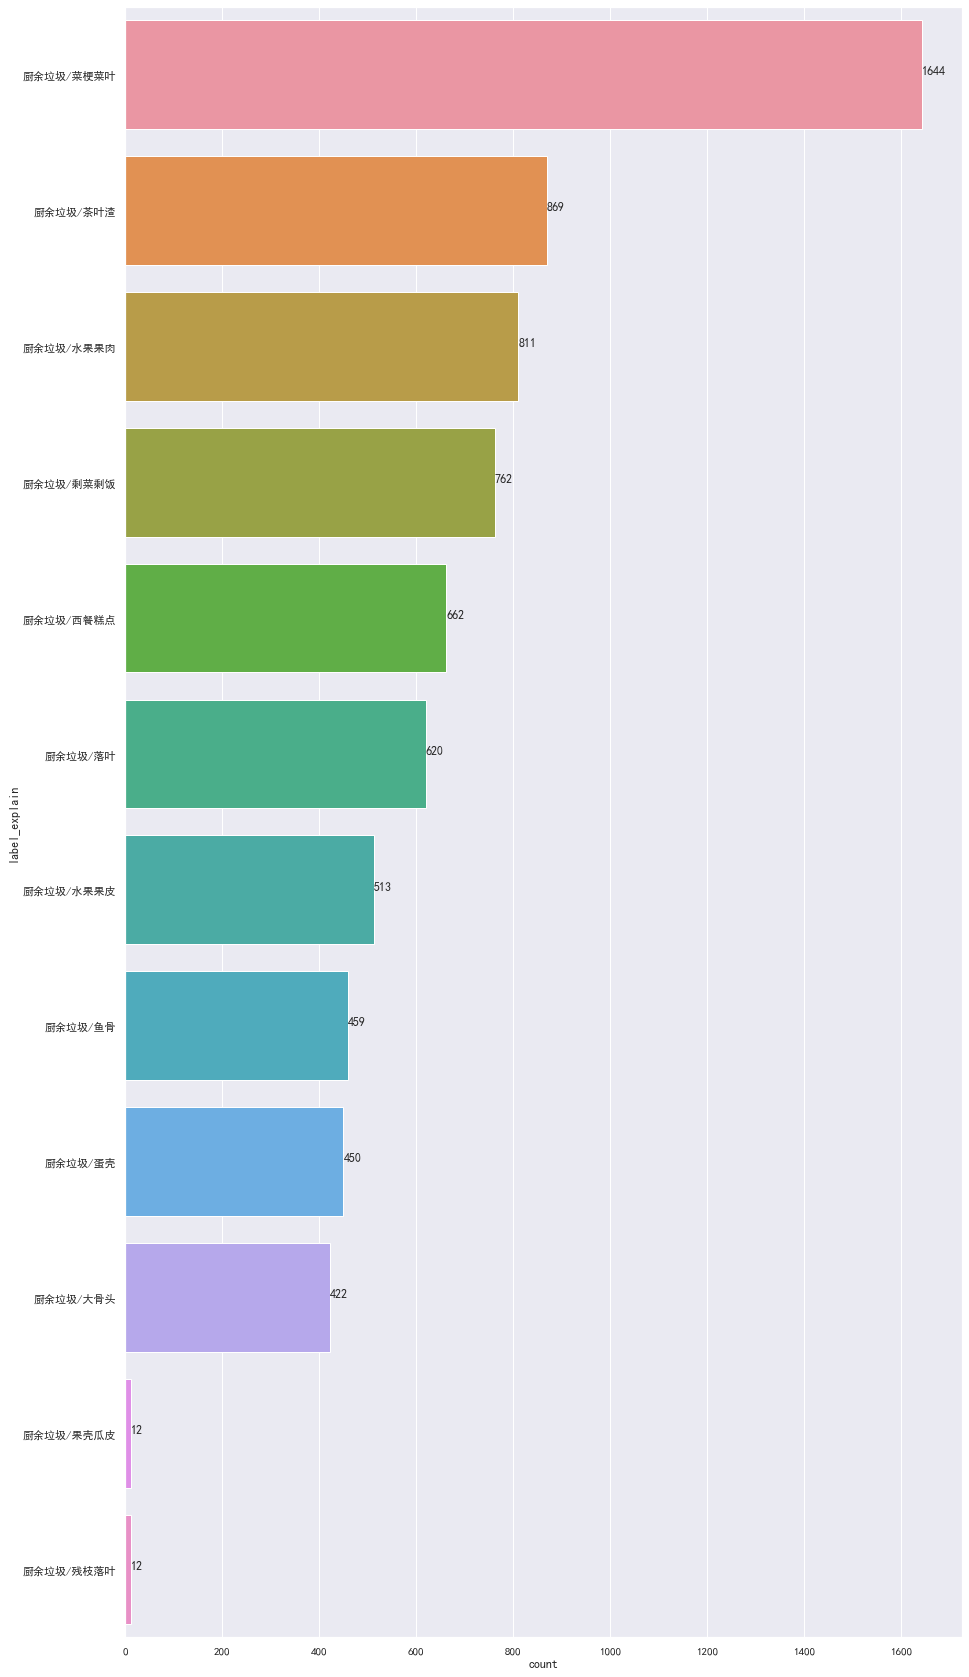

In [138]:
plot_df(df[df['label_bigid']=='2'],"eat.jpg") #厨余

In [ ]:
#合并尿片 卫生纸
#合并

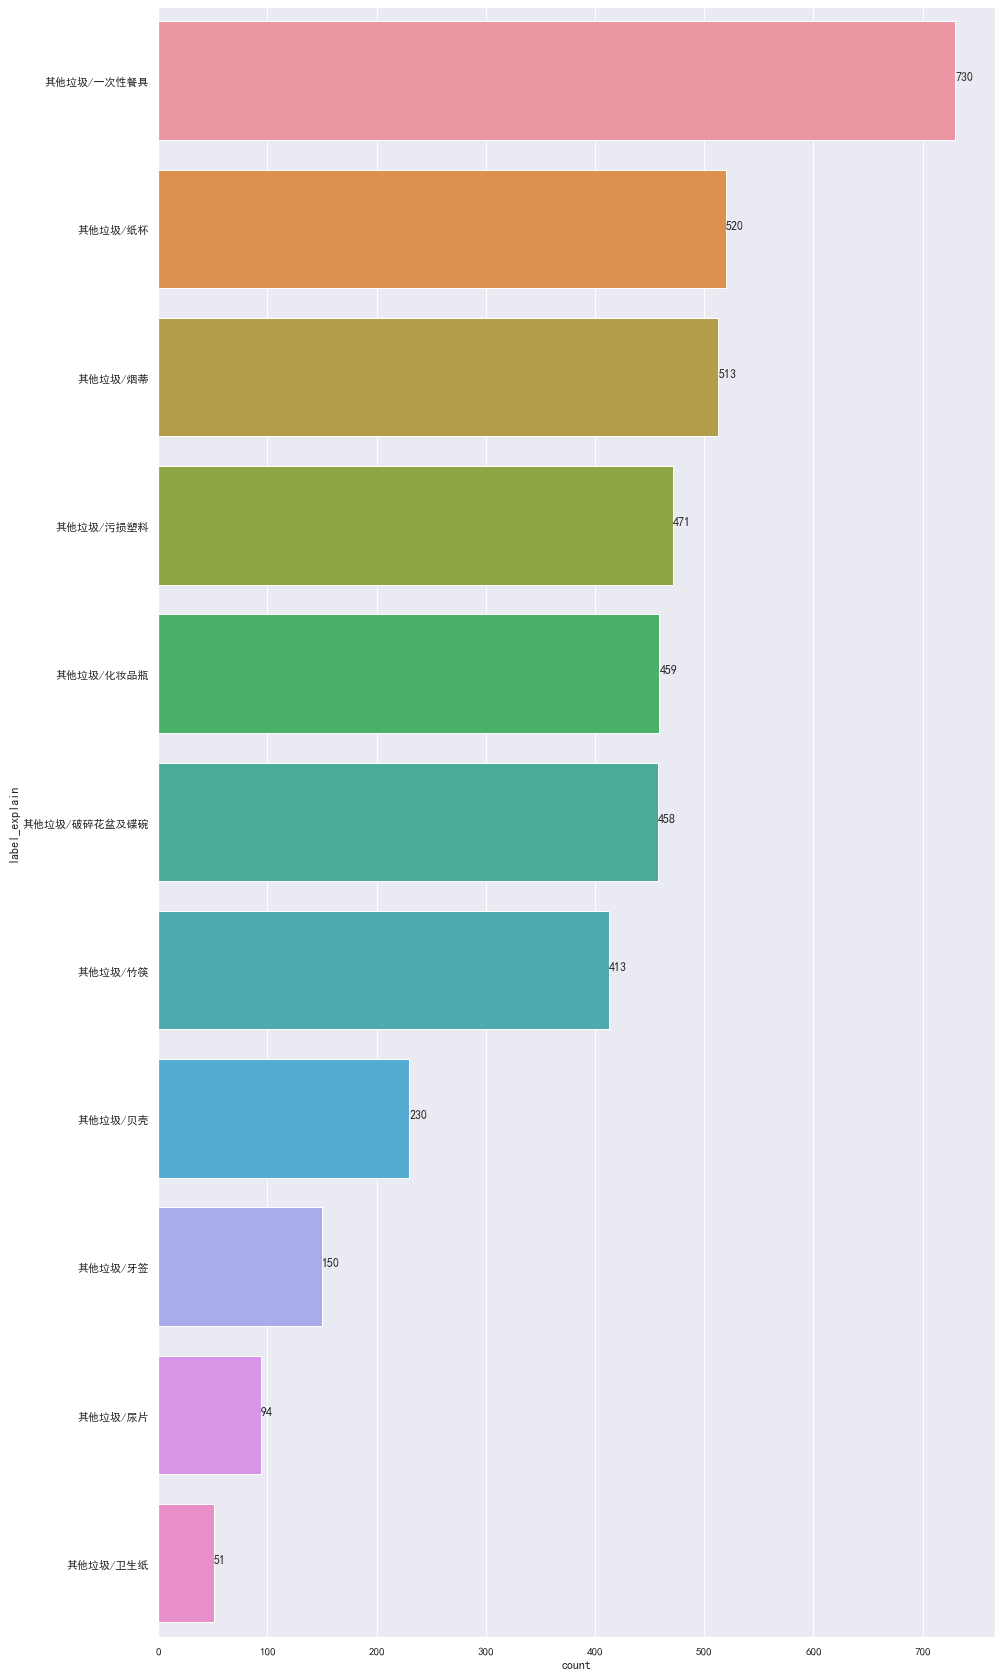

In [139]:
plot_df(df[df['label_bigid']=='3'],"once.jpg") #其他

In [15]:
#有害垃圾
#合并除草剂容器->杀虫剂容器
#合并干电池->电池


#其他垃圾
#合并尿片->卫生纸
#合并

#厨余垃圾
#合并果壳瓜皮 水果果肉 水果果皮
#合并残枝落叶->落叶

In [168]:
def update(dict_):
    count=0
    for key in dict_:
        dict_[key]=count
        count+=1
    return dict_

In [169]:
#combine
start=len(name_to_id)
name_to_id['有害垃圾/除草剂容器+杀虫剂容器']=start
name_to_id.pop('有害垃圾/除草剂容器')
name_to_id.pop('有害垃圾/杀虫剂容器')
name_to_id['有害垃圾/干电池+电池']=start
name_to_id.pop('有害垃圾/干电池')
name_to_id.pop('有害垃圾/电池')
name_to_id['其他垃圾/卫生纸+尿片']=start+1
name_to_id.pop('其他垃圾/卫生纸')
name_to_id.pop('其他垃圾/尿片')
name_to_id['厨余垃圾/果壳瓜皮+水果果皮+水果果肉']=start+2
name_to_id.pop('厨余垃圾/果壳瓜皮')
name_to_id.pop('厨余垃圾/水果果皮')
name_to_id.pop('厨余垃圾/水果果肉')
name_to_id['厨余垃圾/残枝落叶+落叶']=start+3
name_to_id.pop('厨余垃圾/残枝落叶')
name_to_id.pop('厨余垃圾/落叶')

45

In [170]:
name_to_id=update(name_to_id)
id_to_name={}
get_in_map(name_to_id)

In [171]:
len(name_to_id)

54

In [16]:
len(id_to_name)

54

In [17]:
"abc".split('+')

['abc']

In [104]:
def get_df_aftercombine():
    img_path=[]
    relative_path=[]
    label_name=[]
    label_id=[]
    label_bigid=[]
    label_bigname=[]
    for name in name_to_id:
        kind=name.split('/')[-1].split('+')
        for detail in kind:
            new=name.split('/')[0]+'/'+detail+'/'
      
            assert (os.path.exists(basedir+new))
            add=os.listdir(basedir+new)
            for item in add:
                relative_path.append(new+item)
                img_path.append(basedir+new+item)
                label_name.append(name)
                label_bigname.append(name.split('/')[0])
                label_bigid.append(check2[name.split('/')[0]])
                label_id.append(name_to_id[name])
    df=pd.DataFrame()
    df['img_path']=img_path
    df['label']=label_id
    df['label_explain']=label_name
    df['label_bigname']=label_bigname
    df['label_bigid']=label_bigid
    df['label_relative']=relative_path
    
    return df  

In [19]:
combinedf=get_df_aftercombine()

In [151]:
combinedf

,Unnamed: 0,img_path,label,label_explain,label_bigname,label_bigid,label_relative
0,0,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000000.jpg
1,1,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000001.jpg
2,2,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000002.jpg
3,3,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000003.jpg
4,4,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000004.jpg
...,...,...,...,...,...,...,...
29694,29694,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000314.jpg
29695,29695,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000315.jpg
29696,29696,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000316.jpg
29697,29697,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000317.jpg


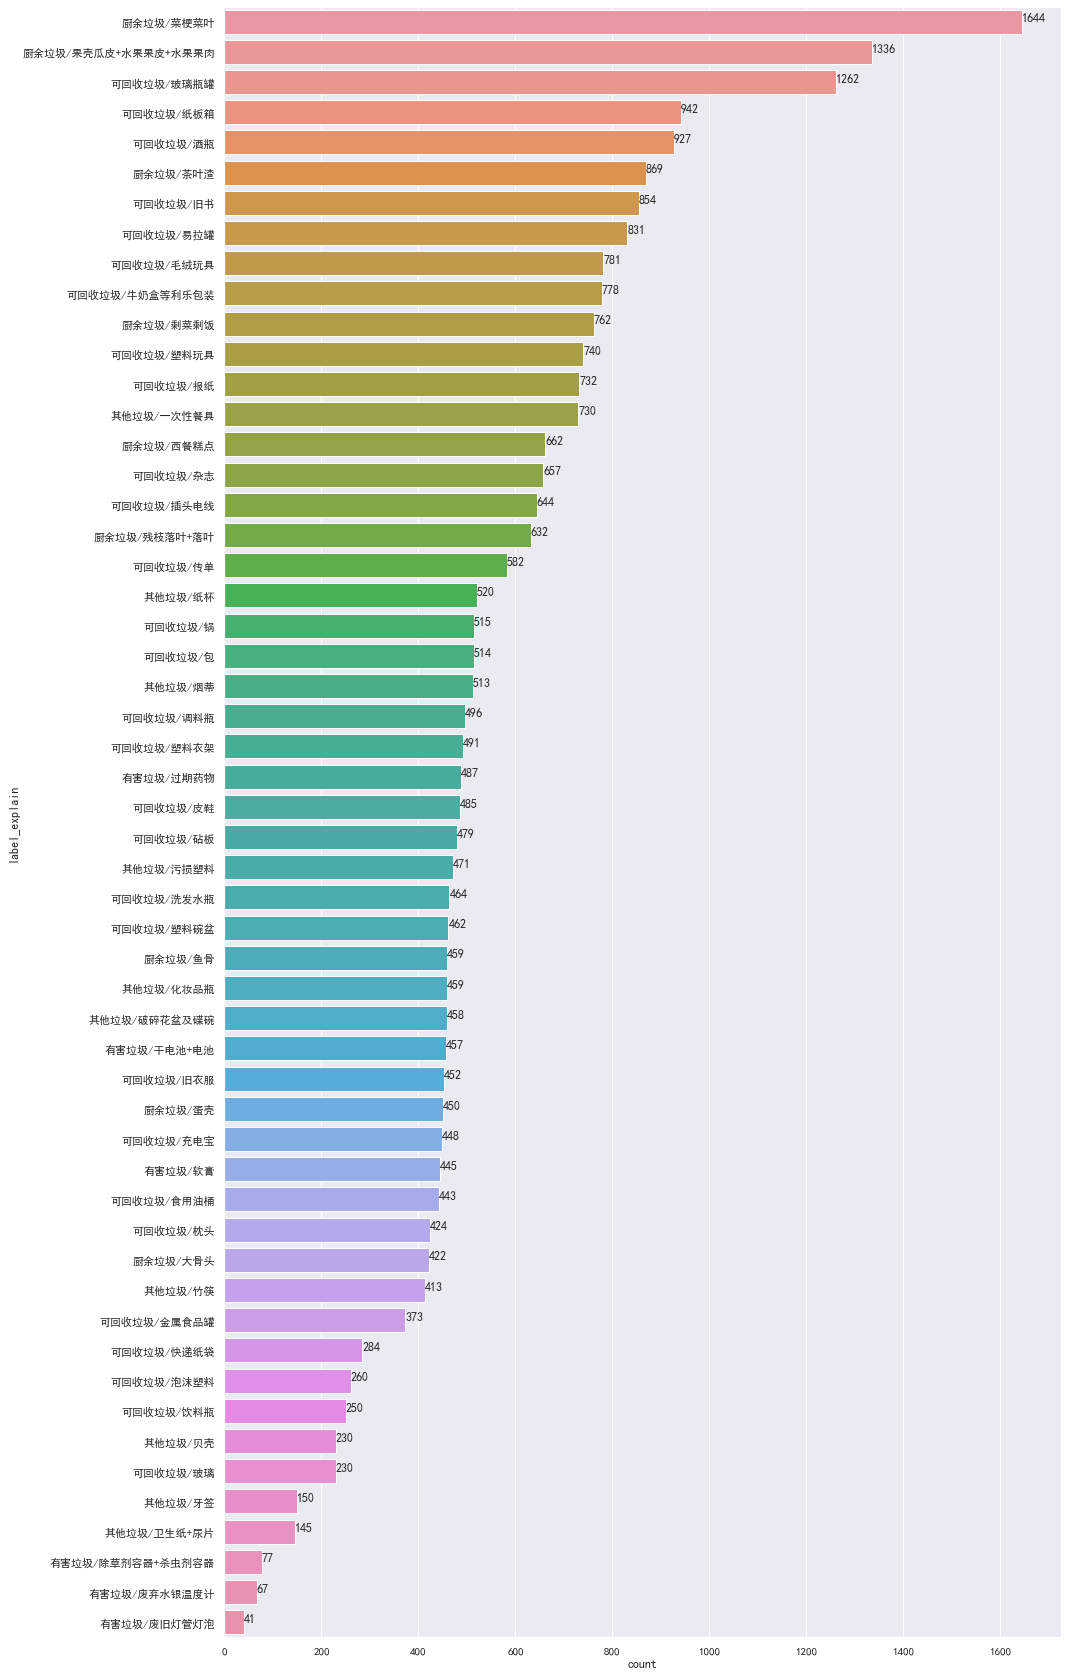

In [223]:
plot_df(combinedf)

In [27]:
combinedf.to_csv("first.csv")

In [21]:
combinedf=pd.read_csv("first.csv")

In [23]:
combinedf

,Unnamed: 0,img_path,label,label_explain,label_bigname,label_bigid,label_relative
0,0,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000000.jpg
1,1,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000001.jpg
2,2,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000002.jpg
3,3,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000003.jpg
4,4,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000004.jpg
...,...,...,...,...,...,...,...
29694,29694,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000314.jpg
29695,29695,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000315.jpg
29696,29696,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000316.jpg
29697,29697,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000317.jpg


In [140]:
matrix=np.loadtxt("D:/dataset_garb/code/log/matrix1.txt",delimiter=',')

In [141]:
matrix

array([[ 500.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,  461.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,  490., ...,    0.,    0.,    0.],
       ...,
       [   2.,    3.,    5., ..., 1433.,    4.,    5.],
       [   0.,    0.,    0., ...,    0.,  883.,    5.],
       [   6.,    2.,    0., ...,    3.,    4.,  990.]])

In [142]:
classes_name=[]
for key in id_to_name:
    classes_name.append(id_to_name[key])

In [147]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (35.0, 35.0) # 设置figure_size尺寸
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
import itertools
def plot_confusion_matrix(cm, classes,num,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.　　 cm:混淆矩阵值　　 classes:分类标签　　 """
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confm{}.jpg'.format(num), dpi=300)
    plt.show()

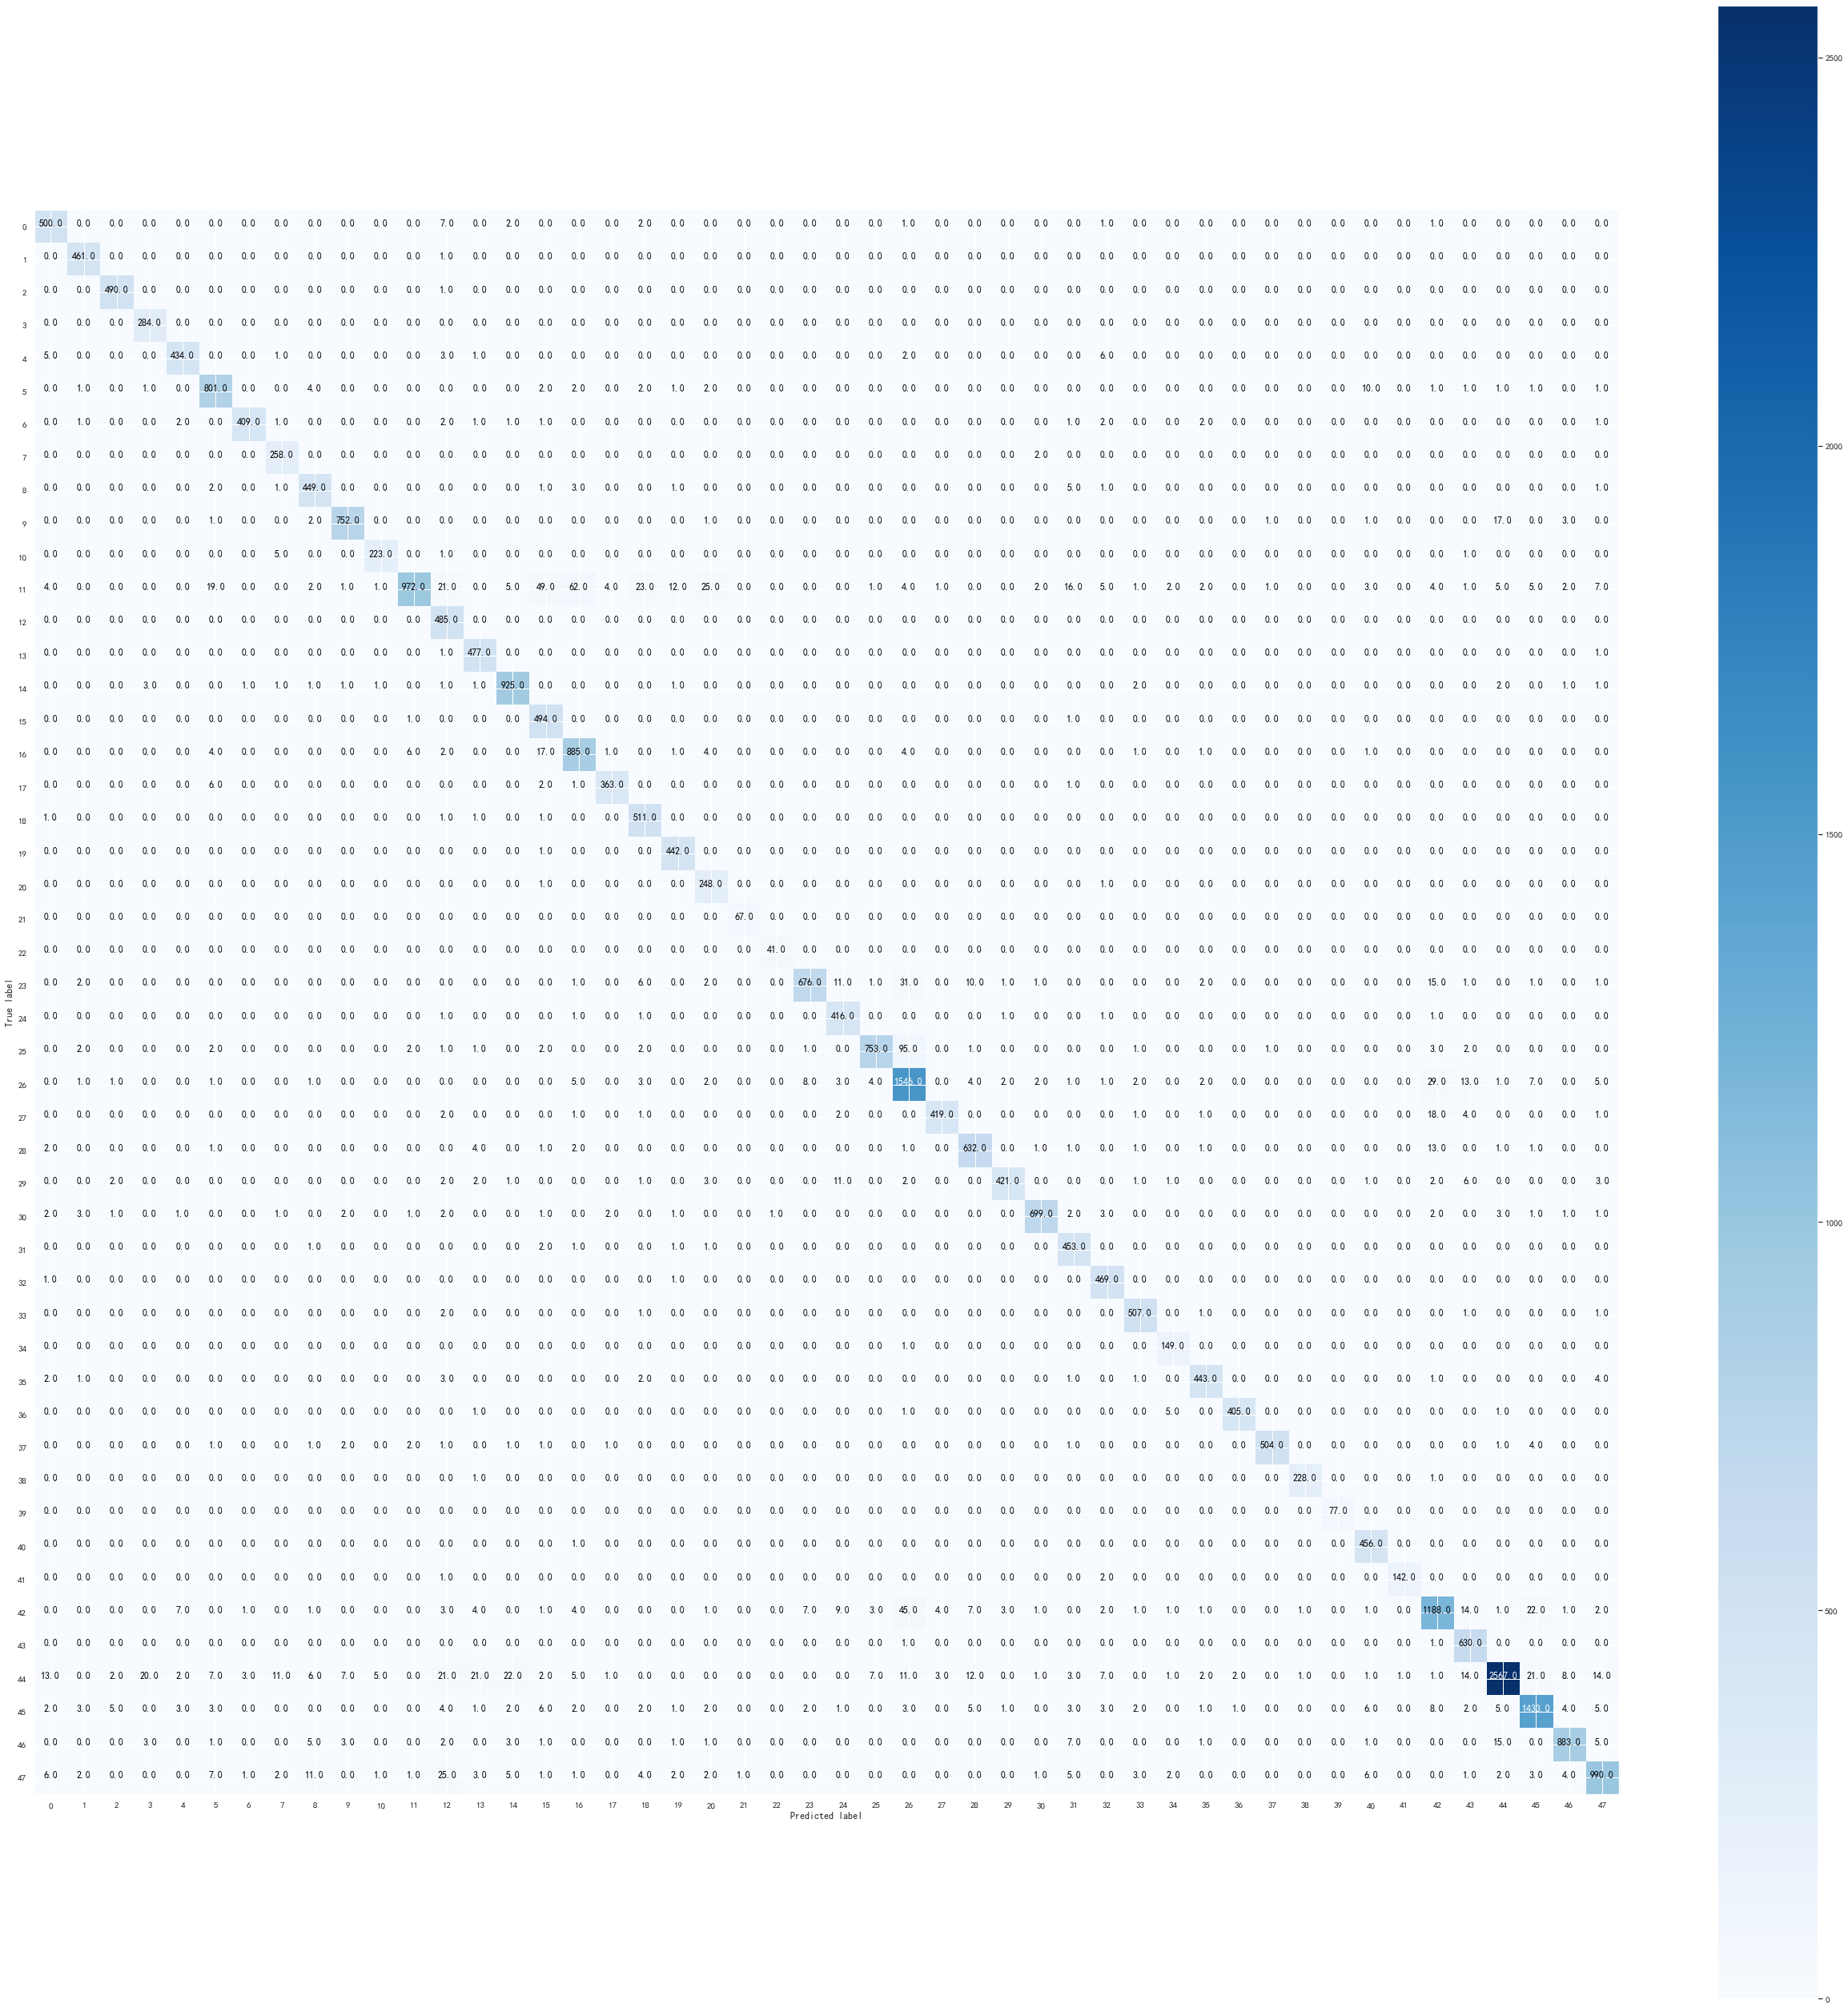

In [149]:
plot_confusion_matrix(matrix, list(range(48)),num=1, title=None,  cmap=plt.cm.Blues)

In [172]:
name_to_id

{'可回收垃圾/传单': 0,
 '可回收垃圾/充电宝': 1,
 '可回收垃圾/包': 2,
 '可回收垃圾/塑料玩具': 3,
 '可回收垃圾/塑料碗盆': 4,
 '可回收垃圾/塑料衣架': 5,
 '可回收垃圾/快递纸袋': 6,
 '可回收垃圾/报纸': 7,
 '可回收垃圾/插头电线': 8,
 '可回收垃圾/旧书': 9,
 '可回收垃圾/旧衣服': 10,
 '可回收垃圾/易拉罐': 11,
 '可回收垃圾/杂志': 12,
 '可回收垃圾/枕头': 13,
 '可回收垃圾/毛绒玩具': 14,
 '可回收垃圾/泡沫塑料': 15,
 '可回收垃圾/洗发水瓶': 16,
 '可回收垃圾/牛奶盒等利乐包装': 17,
 '可回收垃圾/玻璃': 18,
 '可回收垃圾/玻璃瓶罐': 19,
 '可回收垃圾/皮鞋': 20,
 '可回收垃圾/砧板': 21,
 '可回收垃圾/纸板箱': 22,
 '可回收垃圾/调料瓶': 23,
 '可回收垃圾/酒瓶': 24,
 '可回收垃圾/金属食品罐': 25,
 '可回收垃圾/锅': 26,
 '可回收垃圾/食用油桶': 27,
 '可回收垃圾/饮料瓶': 28,
 '有害垃圾/废弃水银温度计': 29,
 '有害垃圾/废旧灯管灯泡': 30,
 '有害垃圾/软膏': 31,
 '有害垃圾/过期药物': 32,
 '厨余垃圾/剩菜剩饭': 33,
 '厨余垃圾/大骨头': 34,
 '厨余垃圾/茶叶渣': 35,
 '厨余垃圾/菜梗菜叶': 36,
 '厨余垃圾/蛋壳': 37,
 '厨余垃圾/西餐糕点': 38,
 '厨余垃圾/鱼骨': 39,
 '其他垃圾/一次性餐具': 40,
 '其他垃圾/化妆品瓶': 41,
 '其他垃圾/污损塑料': 42,
 '其他垃圾/烟蒂': 43,
 '其他垃圾/牙签': 44,
 '其他垃圾/破碎花盆及碟碗': 45,
 '其他垃圾/竹筷': 46,
 '其他垃圾/纸杯': 47,
 '其他垃圾/贝壳': 48,
 '有害垃圾/除草剂容器+杀虫剂容器': 49,
 '有害垃圾/干电池+电池': 50,
 '其他垃圾/卫生纸+尿片': 51,
 '厨余垃圾/果壳瓜皮+水果果皮+水果果肉': 52,
 '厨余垃圾/残枝落叶+落叶': 53}

In [152]:
with open('D:/dataset_garb/code/log/report1.json','r',encoding='utf8')as fp:
    json_data = json.load(fp)

In [153]:
json_data

{'0': {'precision': 0.929368029739777,
  'recall': 0.9727626459143969,
  'f1-score': 0.9505703422053232,
  'support': 514},
 '1': {'precision': 0.9664570230607966,
  'recall': 0.9978354978354979,
  'f1-score': 0.9818956336528222,
  'support': 462},
 '2': {'precision': 0.9780439121756487,
  'recall': 0.9979633401221996,
  'f1-score': 0.9879032258064516,
  'support': 491},
 '3': {'precision': 0.9131832797427653,
  'recall': 1.0,
  'f1-score': 0.9546218487394957,
  'support': 284},
 '4': {'precision': 0.9665924276169265,
  'recall': 0.9601769911504425,
  'f1-score': 0.9633740288568259,
  'support': 452},
 '5': {'precision': 0.9357476635514018,
  'recall': 0.9638989169675091,
  'f1-score': 0.949614700652045,
  'support': 831},
 '6': {'precision': 0.9855421686746988,
  'recall': 0.964622641509434,
  'f1-score': 0.9749702026221694,
  'support': 424},
 '7': {'precision': 0.9181494661921709,
  'recall': 0.9923076923076923,
  'f1-score': 0.9537892791127542,
  'support': 260},
 '8': {'precision'

In [177]:
from pyecharts.charts import Bar
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot

In [181]:
for i in range(48):
    if json_data[str(i)]['f1-score']<0.95:
        bar = Bar()
        error=[]
        error_num=[]
        for j in range(48):
            if(i!=j):
                if(matrix[i][j]>5):
                    error.append(id_to_name[str(j)])
                    error_num.append(matrix[i][j])
        if(len(error)!=0):
            bar.add_xaxis(error)
            bar.add_yaxis(id_to_name[str(i)], error_num)
            name=id_to_name[str(i)].replace('/','_')
            bar.render("D:/dataset_garb/jupyter_code/{}.html".format(name))
            print(i)
            print(id_to_name[str(i)])
            print(json_data[str(i)]['precision'])
            print(json_data[str(i)]['recall'])

5
可回收垃圾/易拉罐
0.9357476635514018
0.9638989169675091
11
可回收垃圾/玻璃瓶罐
0.9868020304568528
0.7702060221870047
16
可回收垃圾/酒瓶
0.9058341862845445
0.9546925566343042
23
厨余垃圾/剩菜剩饭
0.9740634005763689
0.8871391076115486
25
厨余垃圾/茶叶渣
0.9791937581274383
0.8665132336018412
26
厨余垃圾/菜梗菜叶
0.8844393592677345
0.940389294403893
28
厨余垃圾/西餐糕点
0.9418777943368107
0.9546827794561934
29
厨余垃圾/鱼骨
0.9813519813519813
0.9172113289760349
42
厨余垃圾/果壳瓜皮+水果果皮+水果果肉
0.921644685802948
0.8892215568862275
44
可回收垃圾/旧书+传单+杂志+报纸
0.979023646071701
0.9086725663716814
45
可回收垃圾/毛绒玩具+塑料玩具
0.9559706470980653
0.9421433267587114
47
可回收垃圾/插头电线+充电宝
0.9482758620689655
0.9065934065934066


In [65]:
# TRUE      PRE
#插头电线 充电宝、竹筷
#旧书     报纸 杂志 砧板
#易拉罐、破碎花盆及碟碗   金属食品罐 
#软膏     过期药物
#菜梗菜叶  酒瓶 剩菜剩饭 茶叶渣
#牙签      菜梗菜叶
#竹筷     插头电线 旧书 果壳瓜皮+水果果皮+水果果肉
#有害垃圾/除草剂容器+杀虫剂容器 化妆品瓶
#果壳瓜皮+水果果皮+水果果肉   塑料玩具

In [68]:
from pyecharts.charts import Bar
bar = Bar()
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
# render 会生成本地 HTML 文件，默认会在当前目录生成 render.html 文件
# 也可以传入路径参数，如 bar.render("mycharts.html")
bar.render_notebook()

In [25]:
name_to_id

{'可回收垃圾/传单': 0,
 '可回收垃圾/充电宝': 1,
 '可回收垃圾/包': 2,
 '可回收垃圾/塑料玩具': 3,
 '可回收垃圾/塑料碗盆': 4,
 '可回收垃圾/塑料衣架': 5,
 '可回收垃圾/快递纸袋': 6,
 '可回收垃圾/报纸': 7,
 '可回收垃圾/插头电线': 8,
 '可回收垃圾/旧书': 9,
 '可回收垃圾/旧衣服': 10,
 '可回收垃圾/易拉罐': 11,
 '可回收垃圾/杂志': 12,
 '可回收垃圾/枕头': 13,
 '可回收垃圾/毛绒玩具': 14,
 '可回收垃圾/泡沫塑料': 15,
 '可回收垃圾/洗发水瓶': 16,
 '可回收垃圾/牛奶盒等利乐包装': 17,
 '可回收垃圾/玻璃': 18,
 '可回收垃圾/玻璃瓶罐': 19,
 '可回收垃圾/皮鞋': 20,
 '可回收垃圾/砧板': 21,
 '可回收垃圾/纸板箱': 22,
 '可回收垃圾/调料瓶': 23,
 '可回收垃圾/酒瓶': 24,
 '可回收垃圾/金属食品罐': 25,
 '可回收垃圾/锅': 26,
 '可回收垃圾/食用油桶': 27,
 '可回收垃圾/饮料瓶': 28,
 '有害垃圾/废弃水银温度计': 29,
 '有害垃圾/废旧灯管灯泡': 30,
 '有害垃圾/软膏': 31,
 '有害垃圾/过期药物': 32,
 '厨余垃圾/剩菜剩饭': 33,
 '厨余垃圾/大骨头': 34,
 '厨余垃圾/茶叶渣': 35,
 '厨余垃圾/菜梗菜叶': 36,
 '厨余垃圾/蛋壳': 37,
 '厨余垃圾/西餐糕点': 38,
 '厨余垃圾/鱼骨': 39,
 '其他垃圾/一次性餐具': 40,
 '其他垃圾/化妆品瓶': 41,
 '其他垃圾/污损塑料': 42,
 '其他垃圾/烟蒂': 43,
 '其他垃圾/牙签': 44,
 '其他垃圾/破碎花盆及碟碗': 45,
 '其他垃圾/竹筷': 46,
 '其他垃圾/纸杯': 47,
 '其他垃圾/贝壳': 48,
 '有害垃圾/除草剂容器+杀虫剂容器': 49,
 '有害垃圾/干电池+电池': 50,
 '其他垃圾/卫生纸+尿片': 51,
 '厨余垃圾/果壳瓜皮+水果果皮+水果果肉': 52,
 '厨余垃圾/残枝落叶+落叶': 53}

In [97]:
combinedf

,Unnamed: 0,img_path,label,label_explain,label_bigname,label_bigid,label_relative
0,0,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000000.jpg
1,1,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000001.jpg
2,2,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000002.jpg
3,3,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000003.jpg
4,4,D:/dataset_garb/garbagedir/dir/可回收垃圾/传单/baidu0...,0,可回收垃圾/传单,可回收垃圾,0,可回收垃圾/传单/baidu000004.jpg
...,...,...,...,...,...,...,...
29694,29694,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000314.jpg
29695,29695,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000315.jpg
29696,29696,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000316.jpg
29697,29697,D:/dataset_garb/garbagedir/dir/厨余垃圾/落叶/bing000...,53,厨余垃圾/残枝落叶+落叶,厨余垃圾,2,厨余垃圾/落叶/bing000317.jpg


In [98]:
#第二次合并
#旧书+传单+杂志+报纸
#毛绒玩具+塑料玩具
#过期药物+软膏
#纸板箱+快递纸袋
#插头电线+充电宝

In [173]:
#combine
start=len(name_to_id)
name_to_id['可回收垃圾/旧书+传单+杂志+报纸']=start
name_to_id.pop('可回收垃圾/旧书')
name_to_id.pop('可回收垃圾/传单')
name_to_id.pop('可回收垃圾/杂志')
name_to_id.pop('可回收垃圾/报纸')
name_to_id['可回收垃圾/毛绒玩具+塑料玩具']=start
name_to_id.pop('可回收垃圾/毛绒玩具')
name_to_id.pop('可回收垃圾/塑料玩具')
name_to_id['有害垃圾/过期药物+软膏']=start
name_to_id.pop('有害垃圾/过期药物')
name_to_id.pop('有害垃圾/软膏')
name_to_id['可回收垃圾/插头电线+充电宝']=start
name_to_id.pop('可回收垃圾/插头电线')
name_to_id.pop('可回收垃圾/充电宝')

1

In [174]:
len(name_to_id)

48

In [175]:
name_to_id=update(name_to_id)
id_to_name={}
get_in_map(name_to_id)

In [105]:
combinedf2=get_df_aftercombine()

In [106]:
combinedf2

,img_path,label,label_explain,label_bigname,label_bigid,label_relative
0,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1491.jpg
1,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1492.jpg
2,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1493.jpg
3,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1494.jpg
4,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1495.jpg
...,...,...,...,...,...,...
29694,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7198.jpg
29695,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7199.jpg
29696,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7200.jpg
29697,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7205.jpg


In [59]:
a=['train']*2
tmpdf=pd.DataFrame(a)

In [61]:
tmpdf

,0
0,train
1,train


In [62]:
pd.concat([tmpdf,tmpdf],axis=0)

,0
0,train
1,train
0,train
1,train


In [55]:
list(tmpdf)

[0]

In [46]:
tmpdf[[True,False]]="val"

In [ ]:
import random

print( random.randint(1,10) )        # 产生 1 到 10 的一个整数型随机数  

In [48]:
arr3 = np.random.randint(1,60,size=(23))

In [49]:
arr3

array([ 8, 11, 22, 44, 46, 52, 32, 51, 44, 15, 45,  3,  6, 20, 22, 32, 21,
       55, 20, 14, 26, 32, 44])

In [107]:
def devide_train_val(df,val_rate=0.1):
    #each class train:rate=9:1
    use=[]
    for name in name_to_id:
        total_each=len(df[df['label_explain']==name]) #每个类图像总数
        tmpuse=[True]*total_each
        tmpdf=pd.DataFrame(tmpuse)
#         return tmpdf
        val_each=total_each//10
        val_select=np.random.randint(0,total_each,size=(val_each))
        tmpdf.iloc[val_select,:]=False
        use.append(tmpdf)
    new=pd.concat(use,axis=0).reset_index()
    df=pd.concat([df,new],axis=1)
    return df
        
        

In [109]:
newdf=devide_train_val(combinedf2)

In [110]:
newdf.drop('index',axis = 1,inplace = True) #axis参数默认为0

In [111]:
newdf =newdf.rename(columns={0: 'use'})

In [112]:
newdf[newdf['use']==False]

,img_path,label,label_explain,label_bigname,label_bigid,label_relative,use
2,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1493.jpg,False
12,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_15...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1503.jpg,False
14,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_15...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1505.jpg,False
15,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_15...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1506.jpg,False
35,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_15...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1526.jpg,False
...,...,...,...,...,...,...,...
29646,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7132.jpg,False
29659,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7151.jpg,False
29660,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7153.jpg,False
29686,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7183.jpg,False


In [120]:
#清洗

In [113]:
newdf.to_csv("after_div1_combine.csv")

In [117]:
newdf[newdf['use']==True].reset_index().to_csv("after_div1_combine_train.csv")

In [118]:
newdf[newdf['use']==False].reset_index().to_csv("after_div1_combine_val.csv")

In [182]:
name_to_id

{'可回收垃圾/包': 0,
 '可回收垃圾/塑料碗盆': 1,
 '可回收垃圾/塑料衣架': 2,
 '可回收垃圾/快递纸袋': 3,
 '可回收垃圾/旧衣服': 4,
 '可回收垃圾/易拉罐': 5,
 '可回收垃圾/枕头': 6,
 '可回收垃圾/泡沫塑料': 7,
 '可回收垃圾/洗发水瓶': 8,
 '可回收垃圾/牛奶盒等利乐包装': 9,
 '可回收垃圾/玻璃': 10,
 '可回收垃圾/玻璃瓶罐': 11,
 '可回收垃圾/皮鞋': 12,
 '可回收垃圾/砧板': 13,
 '可回收垃圾/纸板箱': 14,
 '可回收垃圾/调料瓶': 15,
 '可回收垃圾/酒瓶': 16,
 '可回收垃圾/金属食品罐': 17,
 '可回收垃圾/锅': 18,
 '可回收垃圾/食用油桶': 19,
 '可回收垃圾/饮料瓶': 20,
 '有害垃圾/废弃水银温度计': 21,
 '有害垃圾/废旧灯管灯泡': 22,
 '厨余垃圾/剩菜剩饭': 23,
 '厨余垃圾/大骨头': 24,
 '厨余垃圾/茶叶渣': 25,
 '厨余垃圾/菜梗菜叶': 26,
 '厨余垃圾/蛋壳': 27,
 '厨余垃圾/西餐糕点': 28,
 '厨余垃圾/鱼骨': 29,
 '其他垃圾/一次性餐具': 30,
 '其他垃圾/化妆品瓶': 31,
 '其他垃圾/污损塑料': 32,
 '其他垃圾/烟蒂': 33,
 '其他垃圾/牙签': 34,
 '其他垃圾/破碎花盆及碟碗': 35,
 '其他垃圾/竹筷': 36,
 '其他垃圾/纸杯': 37,
 '其他垃圾/贝壳': 38,
 '有害垃圾/除草剂容器+杀虫剂容器': 39,
 '有害垃圾/干电池+电池': 40,
 '其他垃圾/卫生纸+尿片': 41,
 '厨余垃圾/果壳瓜皮+水果果皮+水果果肉': 42,
 '厨余垃圾/残枝落叶+落叶': 43,
 '可回收垃圾/旧书+传单+杂志+报纸': 44,
 '可回收垃圾/毛绒玩具+塑料玩具': 45,
 '有害垃圾/过期药物+软膏': 46,
 '可回收垃圾/插头电线+充电宝': 47}

In [183]:
with open("name_to_id{}.json".format("48"),"w") as f:
    json.dump(name_to_id,f)

In [185]:
with open("id_to_name{}.json".format("48"),"w") as f:
    json.dump(id_to_name,f)

In [186]:
detail_to_big={}
for key in id_to_name:
    if(id_to_name[key].split("/")[0]=="可回收垃圾"):
        detail_to_big[key]=0
    if(id_to_name[key].split("/")[0]=="有害垃圾"):
        detail_to_big[key]=1
    if(id_to_name[key].split("/")[0]=="厨余垃圾"):
        detail_to_big[key]=2
    if(id_to_name[key].split("/")[0]=="其他垃圾"):
        detail_to_big[key]=3

In [188]:
with open("detail_to_big{}.json".format("48"),"w") as f:
    json.dump(detail_to_big,f)

In [203]:
tmp=pd.read_csv("after_div1_combine_val.csv")
tmp.drop("Unnamed: 0.1",axis = 1,inplace = True) #axis参数默认为0
tmp.drop("Unnamed: 0",axis = 1,inplace = True) #axis参数默认为0

In [205]:
tmp.to_csv("after_div1_combine_val.csv")

In [206]:
tmp=pd.read_csv("after_div1_combine_train.csv")
tmp.drop("Unnamed: 0.1",axis = 1,inplace = True) #axis参数默认为0
tmp.drop("Unnamed: 0",axis = 1,inplace = True) #axis参数默认为0
tmp.to_csv("after_div1_combine_train.csv")

In [207]:
train_df=pd.read_csv("after_div1_combine_train.csv")

In [208]:
train_logits=np.loadtxt("D:/dataset_garb/code/log/logits3.1.txt",delimiter=',')

In [210]:
train_logits.shape

(26897, 48)

In [248]:
logits_col=[]
for item in train_logits:
    itemlist=""
    for index,i in enumerate(item):
        if(index!=0):
            itemlist+="_"+str(i)
        else:
            itemlist+=str(i)
    logits_col.append(itemlist)

In [249]:
logits_col

['-13.627903_-12.002809_-7.985875_-16.75827_-2.860085_-7.376249_-10.186168_-12.881673_-12.312019_-12.139791_-7.313016_-8.112_-6.626031_-5.503515_-8.670355_-11.283569_-7.924411_-11.10313_-10.991831_-11.448869_-3.7792_-13.845159_-13.963608_-5.080593_0.010132_-2.922114_-2.318771_-2.871862_-6.264705_6.387938_-9.287672_-12.788667_-11.575294_-6.063882_-10.858561_-9.412525_-8.625781_-9.167542_-6.514385_-17.972589_-10.067941_-14.362016_-1.191698_-4.577561_-3.8079_-2.933586_-8.367488_-4.212716',
 '-16.115778_-20.392536_-20.167751_-28.108816_-19.472624_-10.935295_-22.000477_-26.806448_-18.898643_-12.720737_-19.512884_-11.211897_-14.60501_-13.976891_-24.669199_-11.760251_-12.821797_-18.470377_-13.082782_-21.880861_-22.73333_-27.866753_-23.909805_-0.584457_-9.685938_-2.221025_-2.800689_-6.944878_9.827561_-4.331205_-7.113731_-14.586739_-15.606963_-6.74456_-18.122931_-8.905062_-11.110867_-10.986366_-0.195375_-26.34597_-22.141884_-18.204601_-6.460188_-6.556203_-4.634643_-12.625203_-21.486343_-15.3267

In [250]:
train_df['logits']=logits_col

In [217]:
train_df.drop("Unnamed: 0",axis = 1,inplace = True) #axis参数默认为0
train_df.to_csv("after_div1_combine_train.csv")

In [252]:
train_df.to_csv("after_div1_combine_train.csv")

In [251]:
train_df

,img_path,label,label_explain,label_bigname,label_bigid,label_relative,use,logits
0,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1491.jpg,True,-13.627903_-12.002809_-7.985875_-16.75827_-2.8...
1,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1492.jpg,True,-16.115778_-20.392536_-20.167751_-28.108816_-1...
2,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1494.jpg,True,-11.797548_-22.306192_24.331114_-11.608396_-23...
3,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1495.jpg,True,-14.858558_-13.621842_-11.405565_-32.430054_-9...
4,D:/dataset_garb/garbagedir/dir/可回收垃圾/包/fimg_14...,0,可回收垃圾/包,可回收垃圾,0,可回收垃圾/包/fimg_1496.jpg,True,-2.62198_-7.166543_-6.909551_-15.785769_-9.876...
...,...,...,...,...,...,...,...,...
26892,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7196.jpg,True,-8.363065_-9.373464_-10.005811_-22.253504_-5.4...
26893,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7198.jpg,True,-1.650285_-11.618055_-12.677423_-14.391479_5.1...
26894,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7199.jpg,True,-7.541216_-16.828995_8.587474_-14.697357_-7.81...
26895,D:/dataset_garb/garbagedir/dir/可回收垃圾/充电宝/img_7...,47,可回收垃圾/插头电线+充电宝,可回收垃圾,0,可回收垃圾/充电宝/img_7205.jpg,True,-11.674137_-4.549302_-17.181383_-18.372137_-15...


In [270]:
np.asarray(train_df.iloc[:,-1][0])

array('-13.627903_-12.002809_-7.985875_-16.75827_-2.860085_-7.376249_-10.186168_-12.881673_-12.312019_-12.139791_-7.313016_-8.112_-6.626031_-5.503515_-8.670355_-11.283569_-7.924411_-11.10313_-10.991831_-11.448869_-3.7792_-13.845159_-13.963608_-5.080593_0.010132_-2.922114_-2.318771_-2.871862_-6.264705_6.387938_-9.287672_-12.788667_-11.575294_-6.063882_-10.858561_-9.412525_-8.625781_-9.167542_-6.514385_-17.972589_-10.067941_-14.362016_-1.191698_-4.577561_-3.8079_-2.933586_-8.367488_-4.212716',
      dtype='<U487')

In [54]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [55]:
transform =A.Compose(
                [
                    A.Resize(height=224, width=224),
#                     A.RandomSizedCrop(min_max_height=(100, 224),height=224,width=224, p=1),
#                     A.VerticalFlip(p=1),
#                     A.RandomRotate90(p=1),
#                     A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
#                     A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
#                     A.RandomBrightnessContrast(p=0.5),
#                     A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#                     ToTensorV2(),
                ]
            )

In [56]:
path="D:/dataset_garb/garbagedir/dir/可回收垃圾/饮料瓶/img_18092.jpg"

In [57]:
img=np.asarray(Image.open(path))

In [58]:
img_after_tr=transform(image=img)['image']

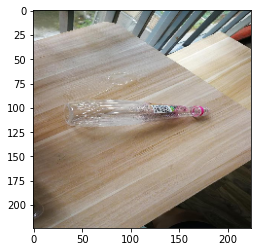

In [59]:
plt.imshow(Image.fromarray(img_after_tr))
plt.savefig("test.jpg")